# work in progress

working on implimenting ARIMA forcasting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np

Reading in the date

In [2]:
df = pd.read_csv('zipnames.csv')

In [3]:
df = pd.DataFrame(df)

In [4]:
df.drop('Unnamed: 0', axis = 1,  inplace = True)

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

In [6]:
df['Date']

0        2021-07-01
1        2021-07-01
2        2021-07-01
3        2021-07-01
4        2021-07-01
            ...    
102489   2016-07-01
102490   2016-07-01
102491   2016-07-01
102492   2016-07-01
102493   2016-07-01
Name: Date, Length: 102494, dtype: datetime64[ns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102494 entries, 0 to 102493
Data columns (total 43 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   Date                                     102494 non-null  datetime64[ns]
 1   ZipCode                                  102494 non-null  int64         
 2   zip_name                                 102494 non-null  object        
 3   median_listing_price                     102494 non-null  float64       
 4   median_listing_price_mm                  81874 non-null   float64       
 5   median_listing_price_yy                  74886 non-null   float64       
 6   active_listing_count                     102494 non-null  float64       
 7   active_listing_count_mm                  81874 non-null   float64       
 8   active_listing_count_yy                  74773 non-null   float64       
 9   median_days_on_market     

In [8]:
df.median_days_on_market

0         32.0
1         35.0
2         35.0
3         21.0
4         27.0
          ... 
102489    31.0
102490    63.0
102491    55.0
102492    22.0
102493    49.0
Name: median_days_on_market, Length: 102494, dtype: float64

In [9]:
df.dropna(axis=1, how='any', thresh=None, subset=None, inplace=True)
df.isna().sum()

Date                                    0
ZipCode                                 0
zip_name                                0
median_listing_price                    0
active_listing_count                    0
median_days_on_market                   0
new_listing_count                       0
price_increased_count                   0
price_reduced_count                     0
pending_listing_count                   0
median_listing_price_per_square_foot    0
median_square_feet                      0
average_listing_price                   0
total_listing_count                     0
pending_ratio                           0
Month                                   0
Year                                    0
city                                    0
State                                   0
dtype: int64

# EDA
trying to play with different visualizations

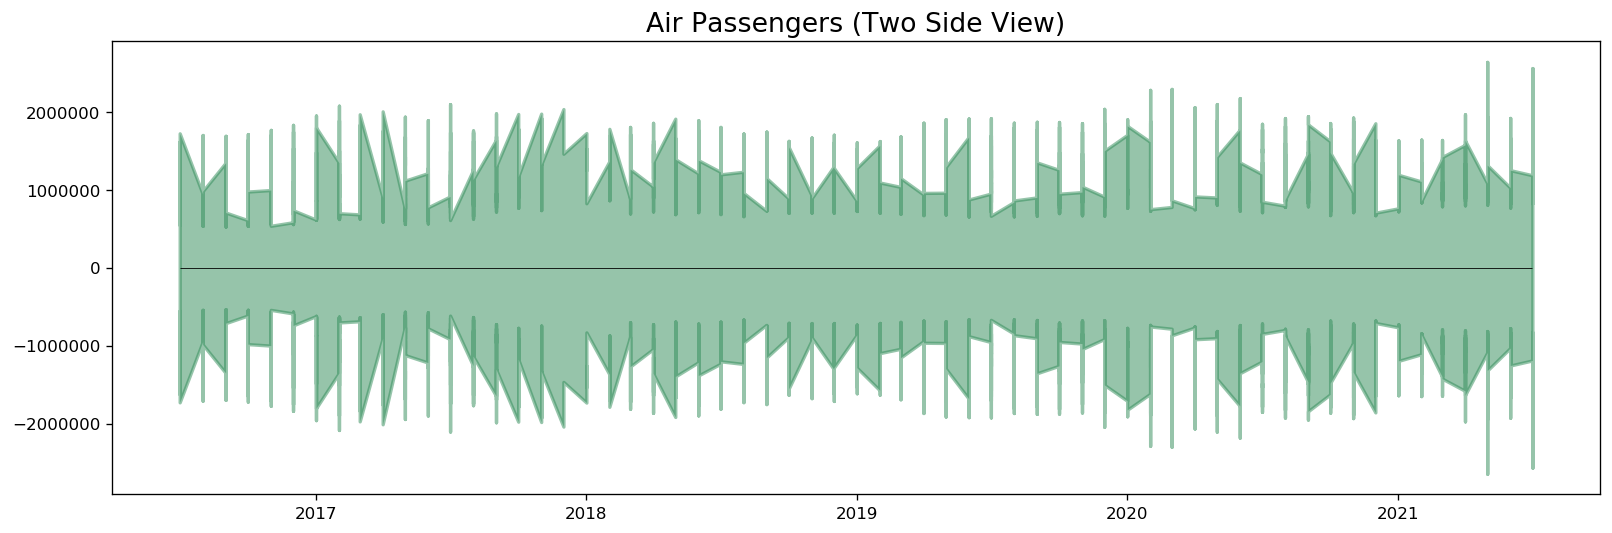

In [23]:
x = city['Date'].values
y1 = city['average_listing_price'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
#plt.ylim(-800, 800)
plt.title('average listing price (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(city.Date), xmax=np.max(city.Date), linewidth=.5)
plt.show()

visualizing the overall trend from year to year of the data i have

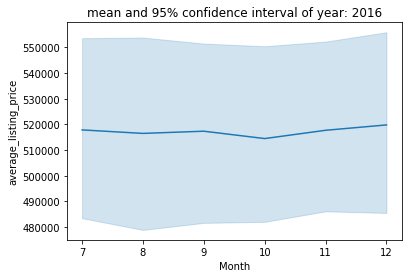

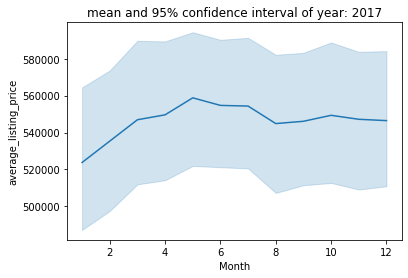

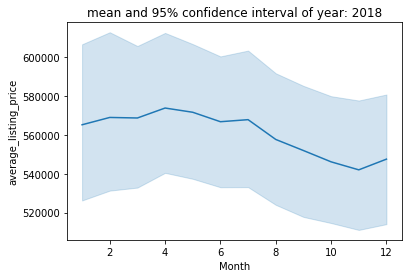

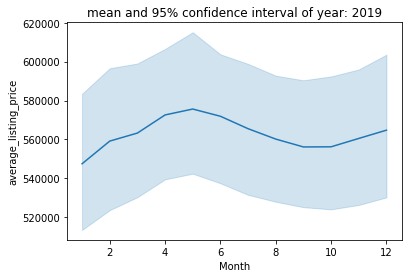

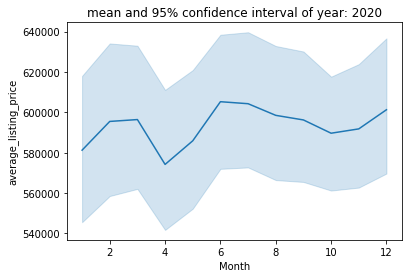

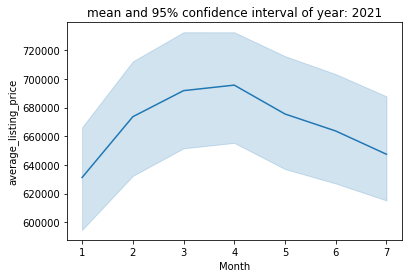

In [24]:
i_year = df.Year.unique()
i_year.sort()

for i in i_year:
    years = df.loc[df.Year == i]
    sns.lineplot('Month', 'average_listing_price', data = years)
    plt.title('mean and 95% confidence interval of year: ' + str(i))
    plt.show()

# Implimenting ARIMA forcasting

checking if series is stationary by running the ADF test<br>
The null hypothesis of the ADF test is: "the time series is non-stationary". So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

In [92]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
Bold = '\033[1m'

for i in df.zip_name.unique():
    citys = df.loc[df['zip_name'] == i]
    result = adfuller(citys.average_listing_price.dropna())
    print(Bold + i + '\033[0m')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('---------------------------------------------')
    print('')

indianapolis, in
ADF Statistic: -17.353378
p-value: 0.000000
---------------------------------------------

orlando, fl
ADF Statistic: -22.544328
p-value: 0.000000
---------------------------------------------

fort lauderdale, fl
ADF Statistic: -42.079800
p-value: 0.000000
---------------------------------------------

austin, tx
ADF Statistic: -7.394680
p-value: 0.000000
---------------------------------------------

san jose, ca
ADF Statistic: -3.989422
p-value: 0.001467
---------------------------------------------

dayton, oh
ADF Statistic: -4.508645
p-value: 0.000190
---------------------------------------------

tucson, az
ADF Statistic: -3.875437
p-value: 0.002223
---------------------------------------------

columbus, oh
ADF Statistic: -28.330228
p-value: 0.000000
---------------------------------------------

minneapolis, mn
ADF Statistic: -50.944806
p-value: 0.000000
---------------------------------------------

el paso, tx
ADF Statistic: -4.326468
p-value: 0.000400
------

As we can see, each state has a p-value of less than 0.05 so the ADF test concludes that the time series data is stationary. this however, is falls. The Dickey fuller(ADF) only test for trend stationarity, we can see that the trends are not stationary by plotting them below. 

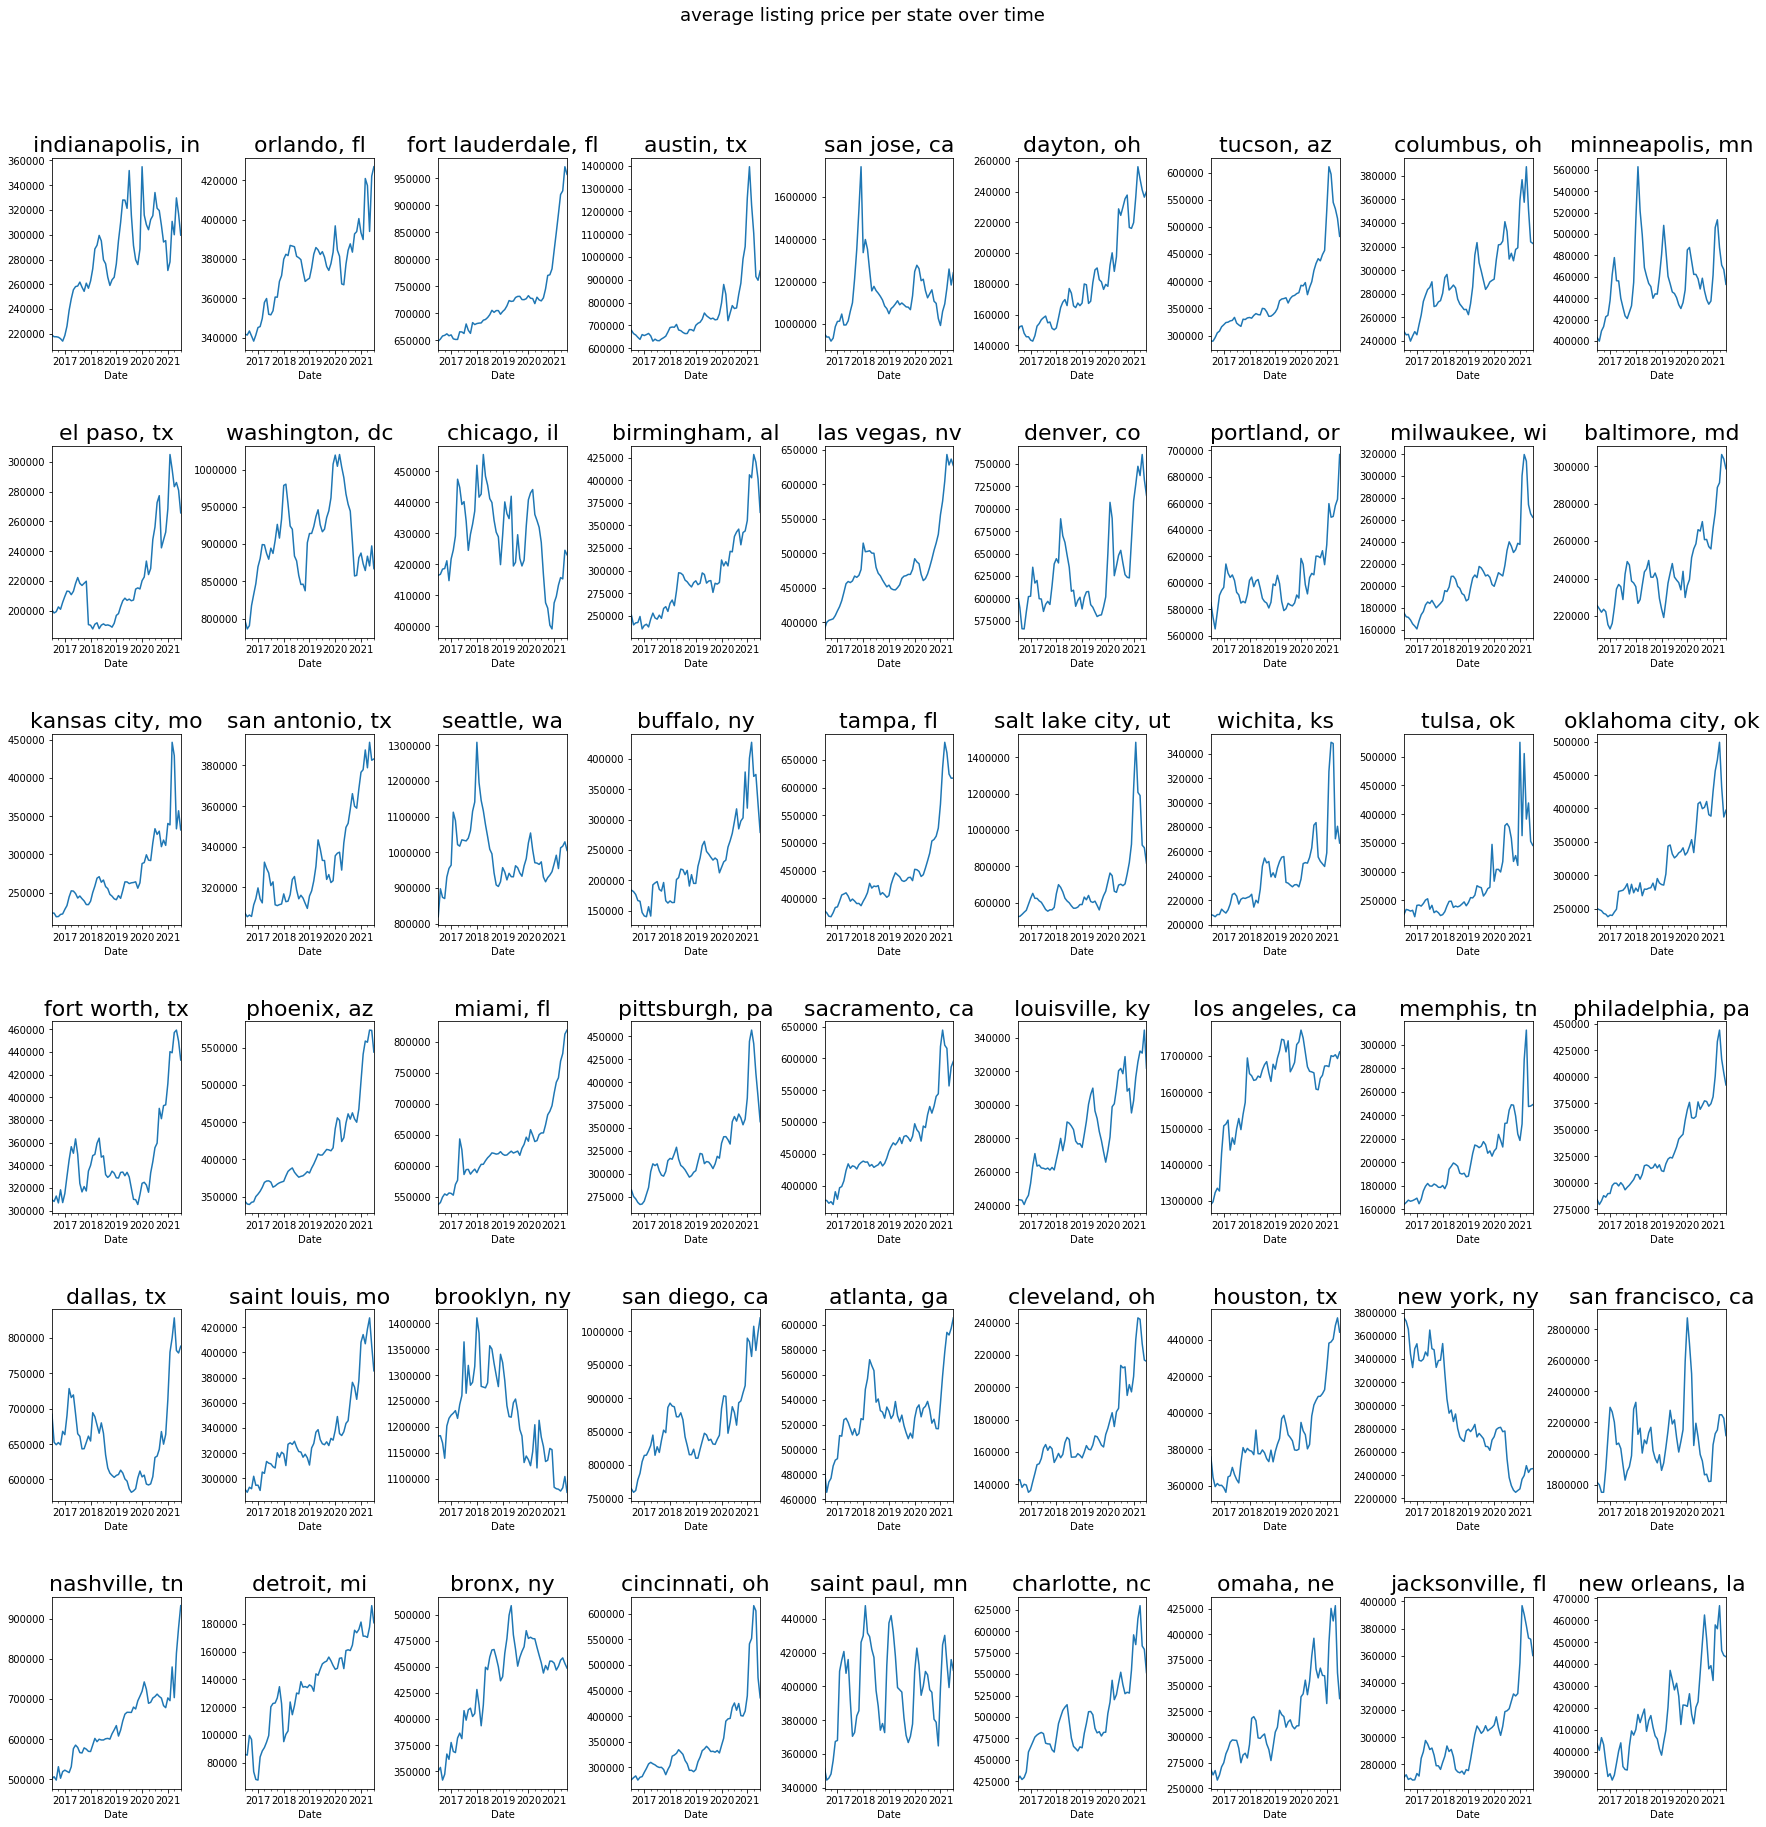

<Figure size 432x288 with 0 Axes>

In [26]:
fig, axs = plt.subplots(nrows=6, ncols=9, figsize=(30, 30))
fig.suptitle("average listing price per state over time", fontsize=18, y=0.95)
plt.subplots_adjust(hspace=0.5, wspace = 0.5)
state1 = df.zip_name.unique()
plt.figure()
for i, ax in zip(state1,axs.ravel()):
    temp = df[df.zip_name == i]
    temp.groupby(['Date'])['average_listing_price'].mean().plot(ax = ax)
    ax.set_title(i, fontsize = 22)

we can tell that the plots are not stationary because the plots trend upward or have a seasonality like pattern to them. the ADF test is not the only way indicate weather or not a time series data set is stationary or not, in this case we can conclude it needs some differenciated simply by inspecting the plots individually. 

we will proceed to differenciate. the function below differenciates, and plots the before and after side by side.

In [90]:
def differenciate(df, city):
    fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
    fig.suptitle(str(city))
    testdf = df[df.zip_name == city]
    testdf = testdf[['Date', 'average_listing_price']]
    testdf['diff'] = testdf['average_listing_price'].diff(-1)
    ax1.plot(testdf['Date'], testdf['average_listing_price'], color = 'g')
    ax2.plot(testdf['Date'], testdf['diff'])
    ax1.set_title('un-differenciated')
    ax2.set_title('differenciated once')
    plt.suptitle(str(city))
    return(testdf)

we can then run this function though the loop and differenciate all of cities at once. 

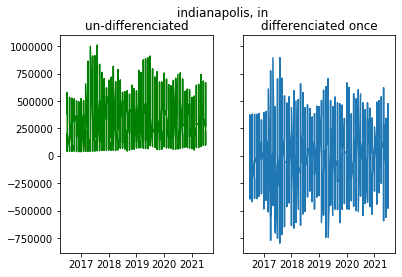

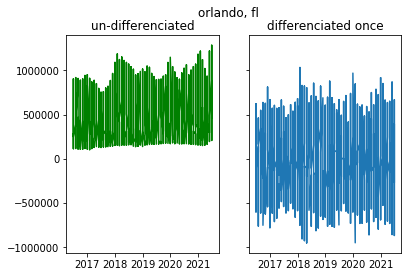

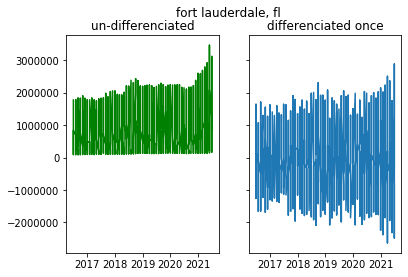

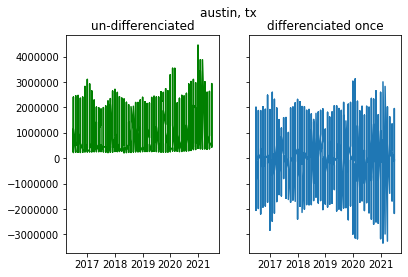

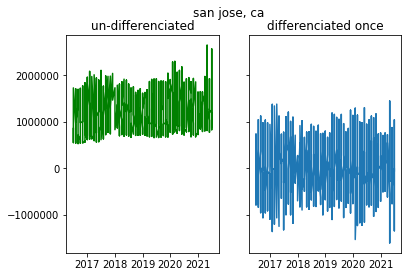

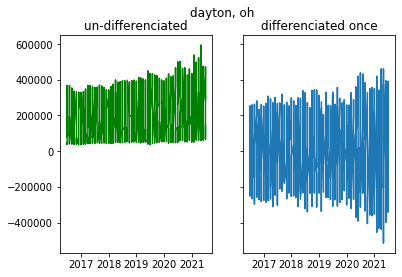

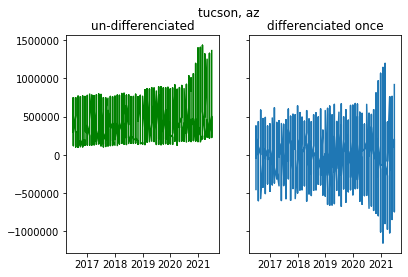

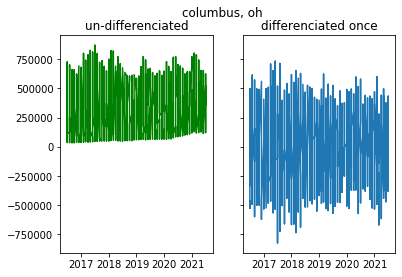

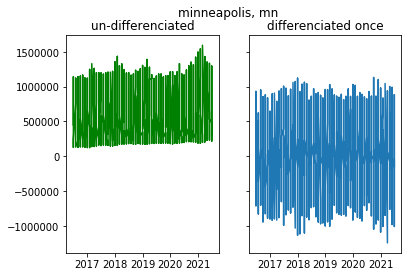

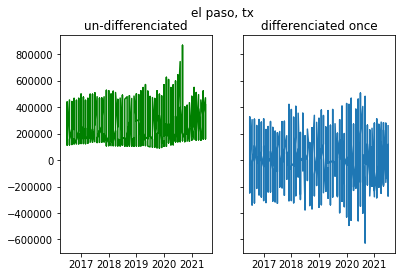

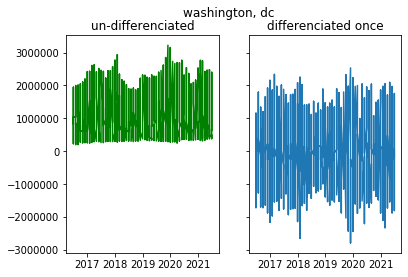

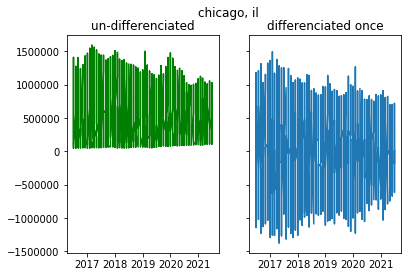

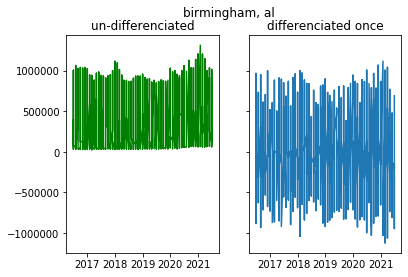

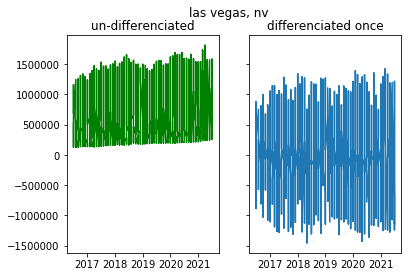

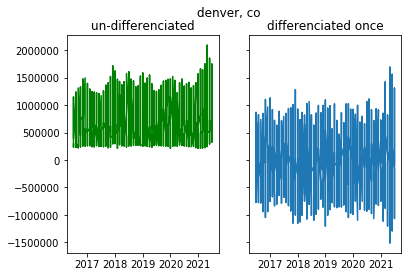

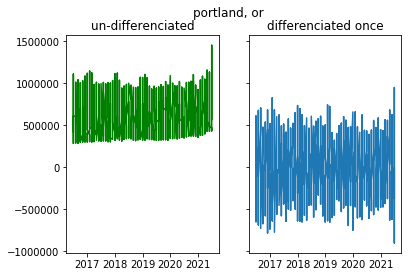

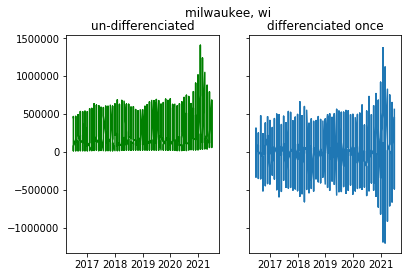

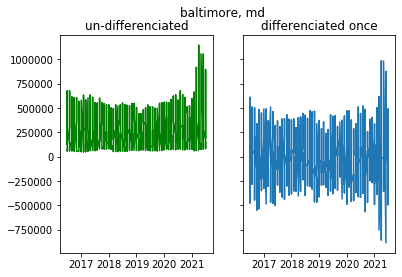

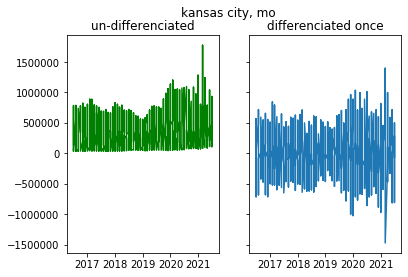

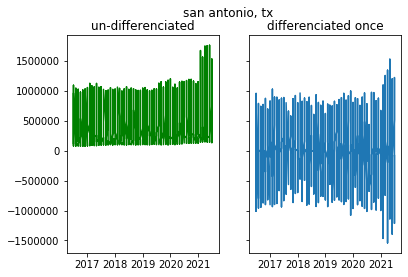

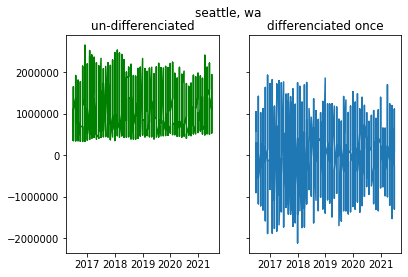

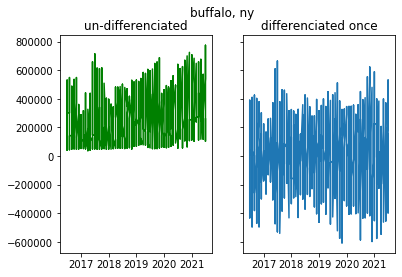

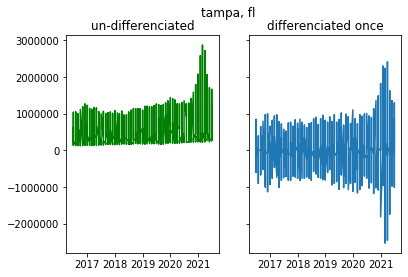

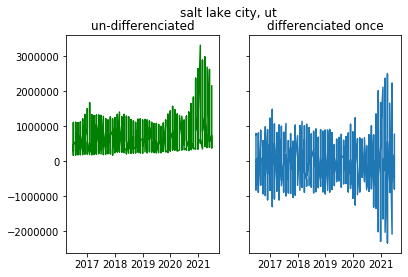

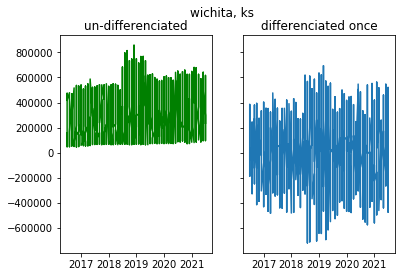

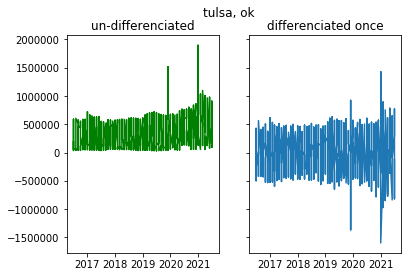

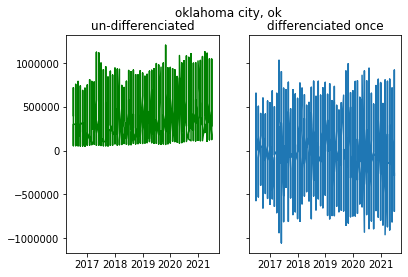

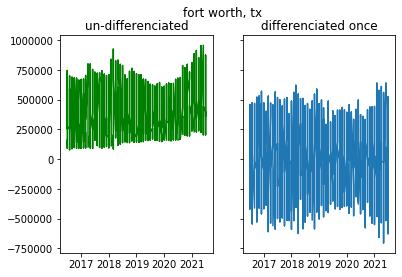

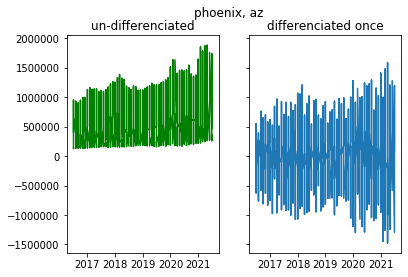

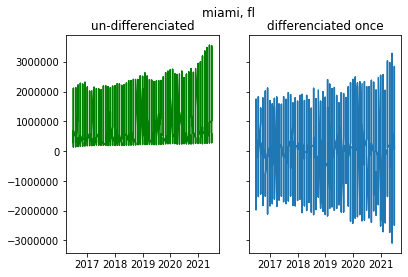

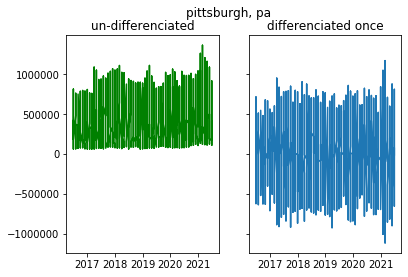

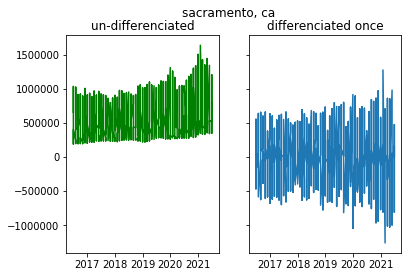

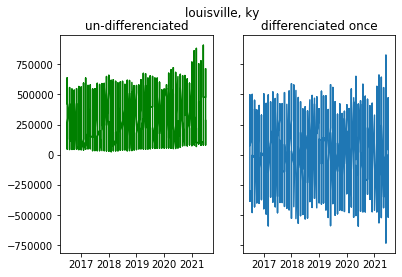

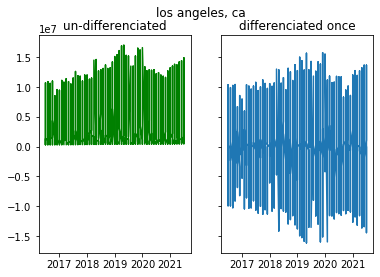

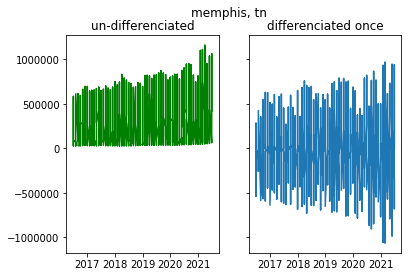

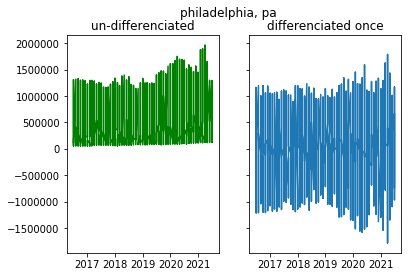

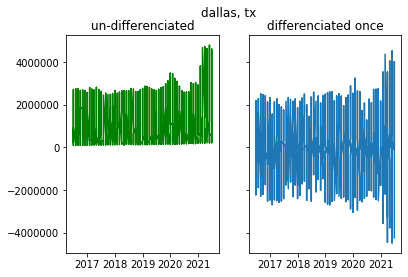

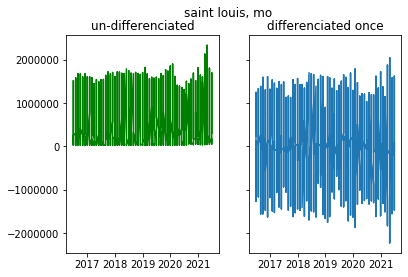

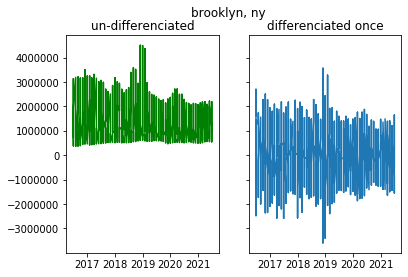

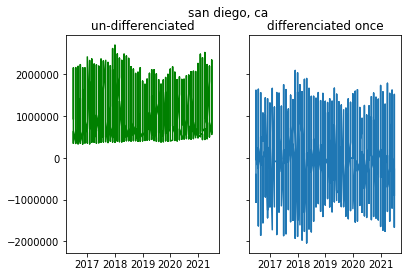

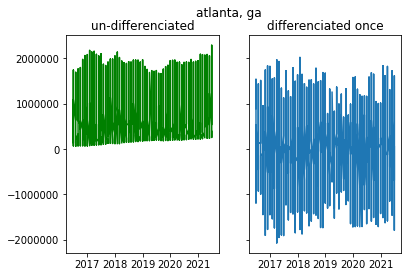

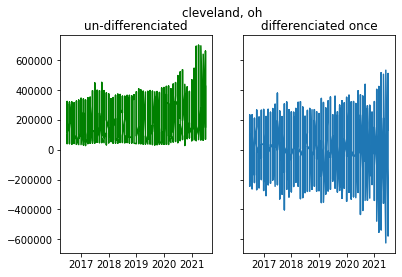

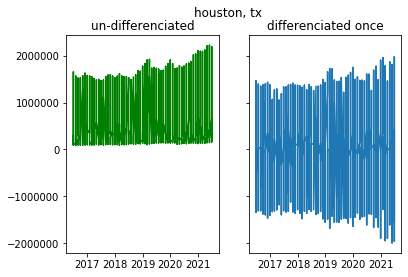

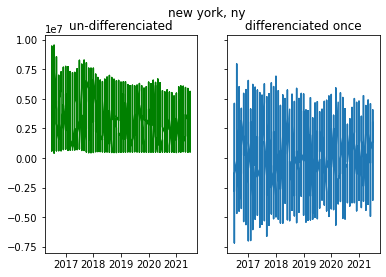

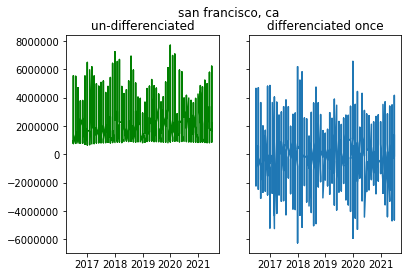

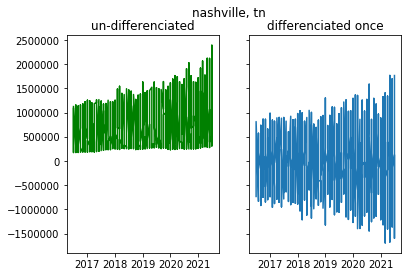

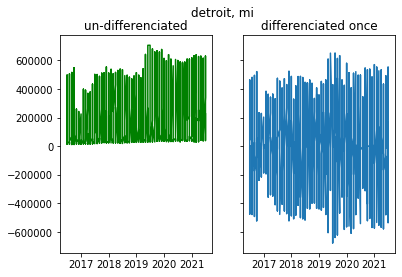

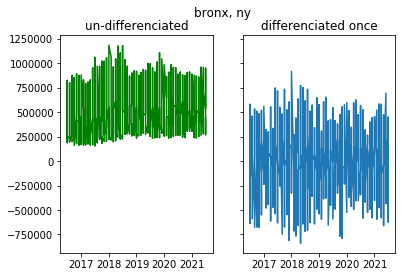

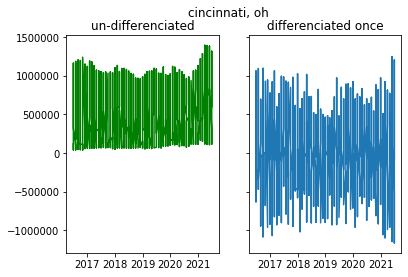

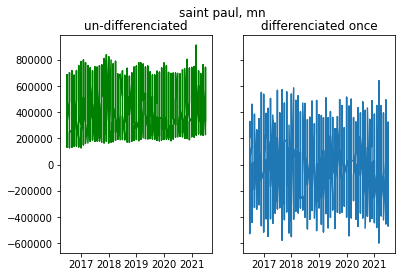

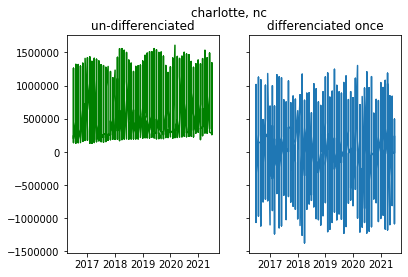

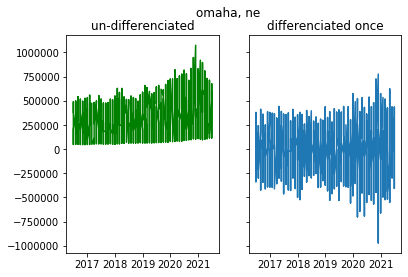

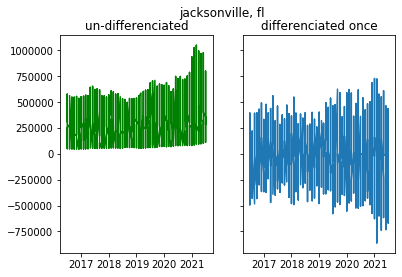

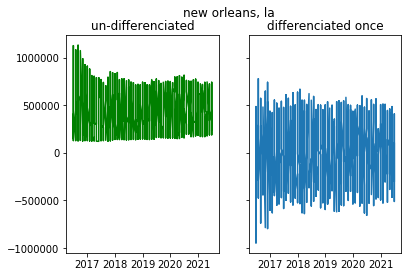

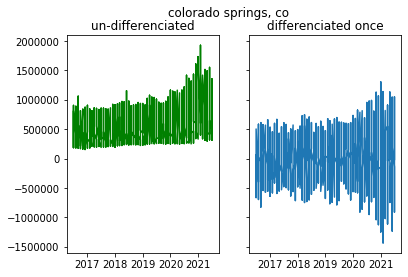

In [91]:
for i in df.zip_name.unique():
    differenciate(df, i)
    plt.show()

the first order differenciation seemed to make the plots more stationary than before. we will now decide wether or not its necessary to differenciate once again or proceed with creating an ARIMA model. 